## EE512: Machine Learning
## Homework-2
### Q5


In [199]:
# import all necessary libraries 

import numpy as np                                    # For matrices and MATLAB like functions                  
from sklearn.model_selection import train_test_split  # To split data into train and test set


# for plotting graphs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Data Generation

Input Feature Vector : $\Large x = [x_1 ,  x_2]^T$ 
<br>
Target Variable : $\Large y$ 
<br>
$$\Large  y = x_1^2 + x_2^3 + x_1x_2$$

In [200]:
n_samples = 1500

X = np.random.uniform(-5,5, (2, n_samples) ).astype(np.float32)

Y = (X[0, :]**2 + X[1,:]**3 + X[0,:]*X[1,:]).astype(np.float32)


### Visualize Mapping from Input Feature Vector $\Large x = [x_1 ,  x_2]^T$ to target variable $\Large y$

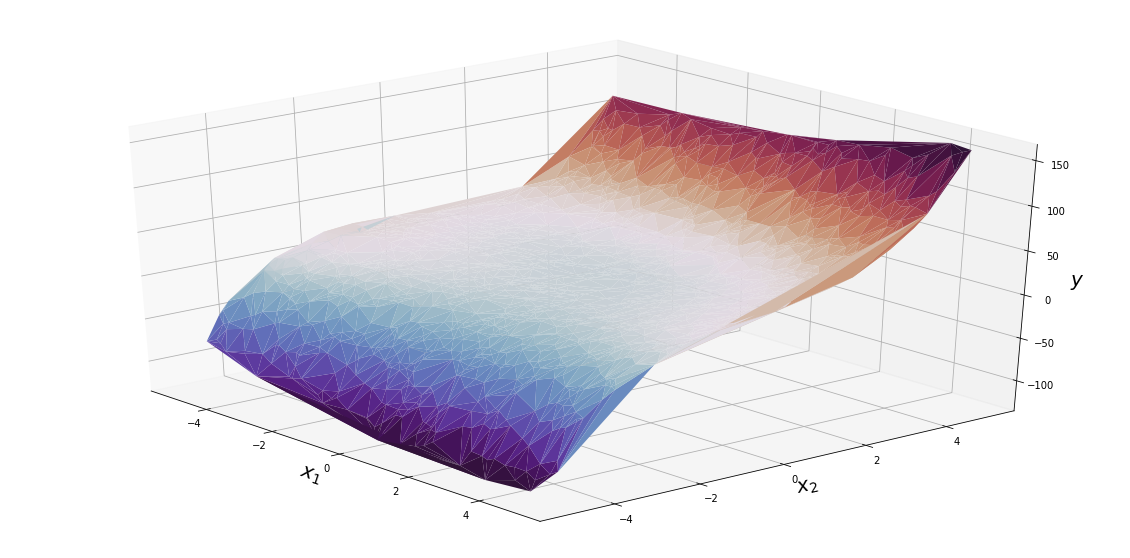

In [201]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')


ax.plot_trisurf(X[0],X[1],Y, cmap='twilight_shifted')
ax.view_init(30, -40)

ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)
ax.set_zlabel(r'$y$'  , fontsize=20)

plt.show()

In [202]:
trainX, testX, trainY, testY = train_test_split(X.T, Y, test_size=0.33, random_state=42)


trainX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1 )
testX  = testX.reshape(testX.shape[0], testX.shape[1], 1 )

trainY = trainY.reshape(trainY.shape[0], 1, 1 )
testY  = testY.reshape(testY.shape[0], 1 ,1)


print("Shape of Train Data:")
print("TrainX: " , trainX.shape)
print("TrainY: " , trainY.shape)



print("\nShape of Test Data:")
print("TestX: " , testX.shape)
print("TestY: " , testY.shape)

Shape of Train Data:
TrainX:  (1005, 2, 1)
TrainY:  (1005, 1, 1)

Shape of Test Data:
TestX:  (495, 2, 1)
TestY:  (495, 1, 1)


---

## NeuralNetwork with Numpy
### Feed Forward and Backpropagation

We will implement 3-layer neural network for regression. Following are the equations for feed forward through network. We are using sigmoid as activation function and mean-squared-error as loss.

$$\Large z_1  = W_1 x + b_1$$
$$\Large h_1  = \sigma(z_1)$$

<br>
<br>

$$\Large z_2  = W_2 h_1 + b_2$$
$$\Large h_2  = \sigma(z_2)$$

<br>
<br>

$$\Large \hat{y}  = W_3 h_2 + b_3$$


<br>
<br>

$$\Large loss  = \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y_i})^2 $$
<center>where N is batch size</center>

In [203]:
class NeuralNetwork(object):        
    
    """
    We will implement neural network as a python class. 
    Object of this class will have a few attributes for example learnable parameters
    and functions such as forward(), backward_propagate() etc.
    
    """
    
    # Initialize attributes of object
    def __init__(self,  input_size = 2 , hidden_size = 3 , output_size = 1 ):        
        
        
        self.input_size  = input_size
        self.hidden_size = hidden_size 
        self.output_size = output_size
        
        
        # Learnable weights of neural network
        self.W1 = np.random.rand( hidden_size , input_size  ) # randomly initialize W1 matrix
        self.b1 = np.random.rand( hidden_size , 1           ) # randomly initialize b1 vector
        
        self.W2 = np.random.rand( hidden_size , hidden_size ) # randomly initialize W2 matrix
        self.b2 = np.random.rand( hidden_size , 1           ) # randomly initialize b2 vector
        
        self.W3 = np.random.rand( output_size , hidden_size ) # randomly initialize W3 matrix
        self.b3 = np.random.rand( output_size , 1           ) # randomly initialize b3 vector
        
        
        # Non-learnable parameters of neural network. These parameters are used in back-propagation
        self.z1 = np.zeros( (hidden_size , 1) ) 
        self.h1 = np.zeros( (hidden_size , 1) ) 
        
        self.z2 = np.zeros( (hidden_size , 1) ) 
        self.h2 = np.zeros( (hidden_size , 1) ) 
          
    
    
    
    # This function just prints a few properties of object created from this class    
    def __str__(self):
        
        msg = "NeuralNetwork:\n\nSize of Input Layer = " + str(self.input_size) + "\nSize of 1st Hidden Layer  = " + str(self.hidden_size)+ "\nSize of 2nd Hidden Layer  = " + str(self.hidden_size)+ "\nSize of Output Layer  = " + str(self.output_size)
                
        return  msg
        
       
    
    
    
    
        
    # Forward propagation through neural network   
    def forward(self, x):
        
        self.z1  = (self.W1 @ x ) + self.b1         # @ operator is used for standard matrix-multiplication      
        self.h1  = self.sigmoid(self.z1)            # element-wise operation on vector
        # complete forward operation
        
        self.z2 = (self.W2 @ self.h1) + self.b2      
        self.h2 = self.sigmoid(self.z2)      

        y_hat = (self.W3 @ self.h2) + self.b3
     
        return y_hat  

    
    
    
    
    # Backward propagation through neural network
    def backward(self , y_hat , x , y , lr):

        # Assuming, MSE (mean square error) loss has been computed
        # Using chain rule, find gradients of learnable parameters of neural network
        # Adjust weights and biases using gradients and learning rate 
        # lr = learning rate
        
        batch_size = y_hat.shape[0]

        # Zero-out all gradients
        grad_b3 = np.zeros((batch_size, self.b3.shape[0], self.b3.shape[1] ))
        grad_W3 = np.zeros((batch_size, self.W3.shape[0], self.W3.shape[1] ))
        
        grad_b2 = np.zeros((batch_size, self.b2.shape[0], self.b2.shape[1] ))
        grad_W2 = np.zeros((batch_size, self.W2.shape[0], self.W2.shape[1] ))
        
        grad_b1 = np.zeros((batch_size, self.b1.shape[0], self.b1.shape[1] ))
        grad_W1 = np.zeros((batch_size, self.W1.shape[0], self.W1.shape[1] ))
  
        # Complete back propagation ..    
        # Record gradients for all examples in given batch


        error_del3 = (-1)*(2/batch_size) * (y - y_hat)
        #10x1x1
        
        for i in range(0,batch_size):
            grad_W3[i,:,:] = error_del3[i,:,:] @ self.h2[i,:,:].T
        #grad_W3 =   (error_del3 @ self.h2)

        grad_b3 = error_del3

        
        

        error_del2 = (self.W3.T @ error_del3) * self.sig_derv(self.z2)

        #grad_W2 =  self.h1 @ error_del2 
        for i in range(0,batch_size):
            grad_W2[i,:,:] = error_del2[i,:,:] @ self.h1[i,:,:].T

        grad_b2 = np.dot(error_del2,1)

        
        error_del1 = (self.W2.T @ error_del2 ) * self.sig_derv(self.z1)
        #grad_W1 = error_del1 @ x

        for i in range(0,batch_size):
            grad_W1[i,:,:] = error_del1[i,:,:] @ x[i,:,:].T
        
        grad_b1 = np.dot(error_del1,1)
   
        # Gradient Descent
        # Take average along batch dimension
        grad_W1 = np.mean(grad_W1,axis=0)
        grad_b1 = np.mean(grad_b1,axis=0)
        
        grad_W2 = np.mean(grad_W2,axis=0)
        grad_b2 = np.mean(grad_b2,axis=0)
        
        grad_W3 = np.mean(grad_W3,axis=0)
        grad_b3 = np.mean(grad_b3,axis=0)
        
        # Update weights and biases using gradients
        
        self.W3 = self.W3 - lr*grad_W3
        self.b3 = self.b3 - lr*grad_b3
        
        
        self.W2 = self.W2 - lr*grad_W2
        self.b2 = self.b2 - lr*grad_b2

        self.W1 = self.W1 - lr*grad_W1
        self.b1 = self.b1 - lr*grad_b1

        


    
    
    
    def sigmoid(self, x):
        # Activation Function
                
        sig_x = np.zeros(x.shape)
        
        # protection from overflow and underflow
        low_x = -30
        up_x  = 30
        
        sig_x[x< low_x]=0
        sig_x[x> up_x ]=1
        
        safe_x = x[(x>= low_x) & (x<= up_x)]
        sig_x[(x>= low_x) & (x<= up_x)] = np.exp(safe_x)/(1+np.exp(safe_x))
        
                
        return sig_x
            
        
    def sig_derv(self,z):
        sig = self.sigmoid(z)
        return sig * (1 - sig)
        
        
        
    def mse_loss(self, y, y_hat):
        # Mean Square Error Loss
        
        loss  =  ((y-y_hat)**2).mean(axis=0)
        
        return loss
 

### Creating a Randomly Initialized Neural Network

In [204]:
MyNeuralNet = NeuralNetwork( input_size = 2 , hidden_size = 4 , output_size = 1 )


print(MyNeuralNet)

NeuralNetwork:

Size of Input Layer = 2
Size of 1st Hidden Layer  = 4
Size of 2nd Hidden Layer  = 4
Size of Output Layer  = 1


### Printing Randomly Initialized Weight Matrix and Bias Vector

In [205]:
print("Weight Matrix of 1st Hidden Layer:\n\nW1 = \n", MyNeuralNet.W1)
print("\n\nBias Vector of 1st Hidden Layer:\n\nb1 = \n", MyNeuralNet.b1)

print("\n\nNote:  You can easily view other learnable weight matrices and bias vectors of neural network using .dot notation.")

Weight Matrix of 1st Hidden Layer:

W1 = 
 [[0.82844044 0.02029443]
 [0.01508358 0.91035961]
 [0.32341901 0.11475465]
 [0.78731869 0.41261392]]


Bias Vector of 1st Hidden Layer:

b1 = 
 [[0.3627131 ]
 [0.51172169]
 [0.40778627]
 [0.81835221]]


Note:  You can easily view other learnable weight matrices and bias vectors of neural network using .dot notation.


In [206]:
x = trainX[:3]
y = trainY[:3]

lr = 0.1


y_hat = MyNeuralNet.forward( x )
print("W1 matrix before weight update: shape", MyNeuralNet.W1.shape)
print("\nW1 = \n", MyNeuralNet.W1)
MyNeuralNet.backward( y_hat , x , y , lr)
print("\n\nW1 matrix after weight update: shape", MyNeuralNet.W1.shape)
print("\nW1 = \n", MyNeuralNet.W1)


W1 matrix before weight update: shape (4, 2)

W1 = 
 [[0.82844044 0.02029443]
 [0.01508358 0.91035961]
 [0.32341901 0.11475465]
 [0.78731869 0.41261392]]


W1 matrix after weight update: shape (4, 2)

W1 = 
 [[0.82273436 0.12037783]
 [0.01888569 0.96202513]
 [0.32829215 0.32288234]
 [0.76942472 0.5059135 ]]


## Train Neural Network

In [212]:
MyNeuralNet = NeuralNetwork( input_size = 2 , hidden_size = 16 , output_size = 1 )


print(MyNeuralNet)

lr = 0.1

n_epochs = 1000


n_examples = trainX.shape[0]

batch_size = 50

n_batches = n_examples//batch_size

epoch_loss = []


print("\n\nTraining...")
for epoch in range(n_epochs):
    
    loss=0
    
    for i in range(n_batches):
        
        x = trainX[(i*batch_size):(i*batch_size+batch_size)]
        y = trainY[(i*batch_size):(i*batch_size+batch_size)]
        
        # Forward Pass
        y_hat = MyNeuralNet.forward( x )
        
        loss = loss+MyNeuralNet.mse_loss(y,y_hat)
        
        # Backpropagation
        MyNeuralNet.backward( y_hat , x , y , lr)
        
    epoch_loss.append(loss.squeeze()/n_batches)    
    print("Epoch = %3d   Loss = %3.3f"%(epoch, epoch_loss[epoch]) )
    
print("\nDone.")    

NeuralNetwork:

Size of Input Layer = 2
Size of 1st Hidden Layer  = 16
Size of 2nd Hidden Layer  = 16
Size of Output Layer  = 1


Training...
Epoch =   0   Loss = 2103.245
Epoch =   1   Loss = 2076.042
Epoch =   2   Loss = 2034.969
Epoch =   3   Loss = 1983.085
Epoch =   4   Loss = 1920.410
Epoch =   5   Loss = 1845.695
Epoch =   6   Loss = 1764.343
Epoch =   7   Loss = 1684.809
Epoch =   8   Loss = 1612.889
Epoch =   9   Loss = 1550.213
Epoch =  10   Loss = 1495.626
Epoch =  11   Loss = 1446.542
Epoch =  12   Loss = 1399.572
Epoch =  13   Loss = 1351.242
Epoch =  14   Loss = 1300.208
Epoch =  15   Loss = 1248.267
Epoch =  16   Loss = 1197.113
Epoch =  17   Loss = 1147.030
Epoch =  18   Loss = 1098.102
Epoch =  19   Loss = 1051.512
Epoch =  20   Loss = 1008.078
Epoch =  21   Loss = 968.097
Epoch =  22   Loss = 931.389
Epoch =  23   Loss = 897.335
Epoch =  24   Loss = 865.147
Epoch =  25   Loss = 834.195
Epoch =  26   Loss = 804.535
Epoch =  27   Loss = 776.594
Epoch =  28   Loss = 750.

Epoch = 286   Loss = 25.281
Epoch = 287   Loss = 25.129
Epoch = 288   Loss = 24.977
Epoch = 289   Loss = 24.828
Epoch = 290   Loss = 24.679
Epoch = 291   Loss = 24.532
Epoch = 292   Loss = 24.387
Epoch = 293   Loss = 24.243
Epoch = 294   Loss = 24.100
Epoch = 295   Loss = 23.959
Epoch = 296   Loss = 23.819
Epoch = 297   Loss = 23.681
Epoch = 298   Loss = 23.544
Epoch = 299   Loss = 23.408
Epoch = 300   Loss = 23.273
Epoch = 301   Loss = 23.140
Epoch = 302   Loss = 23.008
Epoch = 303   Loss = 22.878
Epoch = 304   Loss = 22.748
Epoch = 305   Loss = 22.620
Epoch = 306   Loss = 22.494
Epoch = 307   Loss = 22.368
Epoch = 308   Loss = 22.244
Epoch = 309   Loss = 22.121
Epoch = 310   Loss = 21.999
Epoch = 311   Loss = 21.878
Epoch = 312   Loss = 21.759
Epoch = 313   Loss = 21.641
Epoch = 314   Loss = 21.524
Epoch = 315   Loss = 21.408
Epoch = 316   Loss = 21.293
Epoch = 317   Loss = 21.180
Epoch = 318   Loss = 21.067
Epoch = 319   Loss = 20.956
Epoch = 320   Loss = 20.846
Epoch = 321   Loss =

Epoch = 584   Loss = 7.857
Epoch = 585   Loss = 7.830
Epoch = 586   Loss = 7.803
Epoch = 587   Loss = 7.776
Epoch = 588   Loss = 7.749
Epoch = 589   Loss = 7.722
Epoch = 590   Loss = 7.696
Epoch = 591   Loss = 7.669
Epoch = 592   Loss = 7.642
Epoch = 593   Loss = 7.616
Epoch = 594   Loss = 7.590
Epoch = 595   Loss = 7.564
Epoch = 596   Loss = 7.538
Epoch = 597   Loss = 7.512
Epoch = 598   Loss = 7.486
Epoch = 599   Loss = 7.460
Epoch = 600   Loss = 7.434
Epoch = 601   Loss = 7.409
Epoch = 602   Loss = 7.383
Epoch = 603   Loss = 7.358
Epoch = 604   Loss = 7.333
Epoch = 605   Loss = 7.307
Epoch = 606   Loss = 7.282
Epoch = 607   Loss = 7.257
Epoch = 608   Loss = 7.233
Epoch = 609   Loss = 7.208
Epoch = 610   Loss = 7.183
Epoch = 611   Loss = 7.158
Epoch = 612   Loss = 7.134
Epoch = 613   Loss = 7.109
Epoch = 614   Loss = 7.085
Epoch = 615   Loss = 7.061
Epoch = 616   Loss = 7.037
Epoch = 617   Loss = 7.013
Epoch = 618   Loss = 6.989
Epoch = 619   Loss = 6.965
Epoch = 620   Loss = 6.941
E

Epoch = 888   Loss = 3.369
Epoch = 889   Loss = 3.362
Epoch = 890   Loss = 3.355
Epoch = 891   Loss = 3.348
Epoch = 892   Loss = 3.341
Epoch = 893   Loss = 3.334
Epoch = 894   Loss = 3.327
Epoch = 895   Loss = 3.320
Epoch = 896   Loss = 3.313
Epoch = 897   Loss = 3.306
Epoch = 898   Loss = 3.299
Epoch = 899   Loss = 3.292
Epoch = 900   Loss = 3.285
Epoch = 901   Loss = 3.279
Epoch = 902   Loss = 3.272
Epoch = 903   Loss = 3.265
Epoch = 904   Loss = 3.258
Epoch = 905   Loss = 3.252
Epoch = 906   Loss = 3.245
Epoch = 907   Loss = 3.238
Epoch = 908   Loss = 3.232
Epoch = 909   Loss = 3.225
Epoch = 910   Loss = 3.218
Epoch = 911   Loss = 3.212
Epoch = 912   Loss = 3.205
Epoch = 913   Loss = 3.199
Epoch = 914   Loss = 3.192
Epoch = 915   Loss = 3.186
Epoch = 916   Loss = 3.180
Epoch = 917   Loss = 3.173
Epoch = 918   Loss = 3.167
Epoch = 919   Loss = 3.161
Epoch = 920   Loss = 3.154
Epoch = 921   Loss = 3.148
Epoch = 922   Loss = 3.142
Epoch = 923   Loss = 3.136
Epoch = 924   Loss = 3.130
E

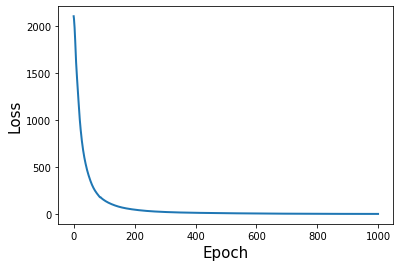

In [213]:
plt.plot(epoch_loss, linewidth=2)
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.show()

## Prediction

In [214]:
y_pred = MyNeuralNet.forward(testX)

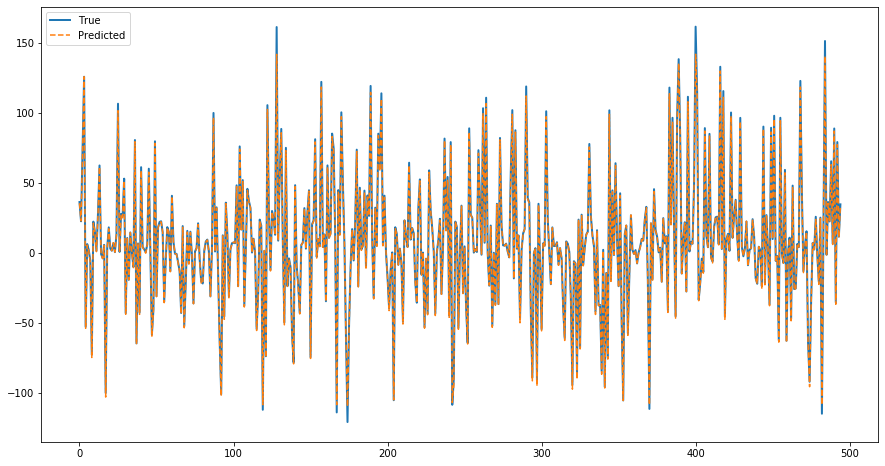

In [215]:
plt.figure(figsize=(15,8))
plt.plot(testY.squeeze(), linewidth=2 , label="True")
plt.plot(y_pred.squeeze(), linestyle="--",  label="Predicted")
plt.legend()
plt.show()

### LOSS


In [216]:
print("MSE On testing:", MyNeuralNet.mse_loss(testY,y_pred))

MSE On testing: [[3.86880181]]
